/tmp/ipykernel_3324/15208999.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

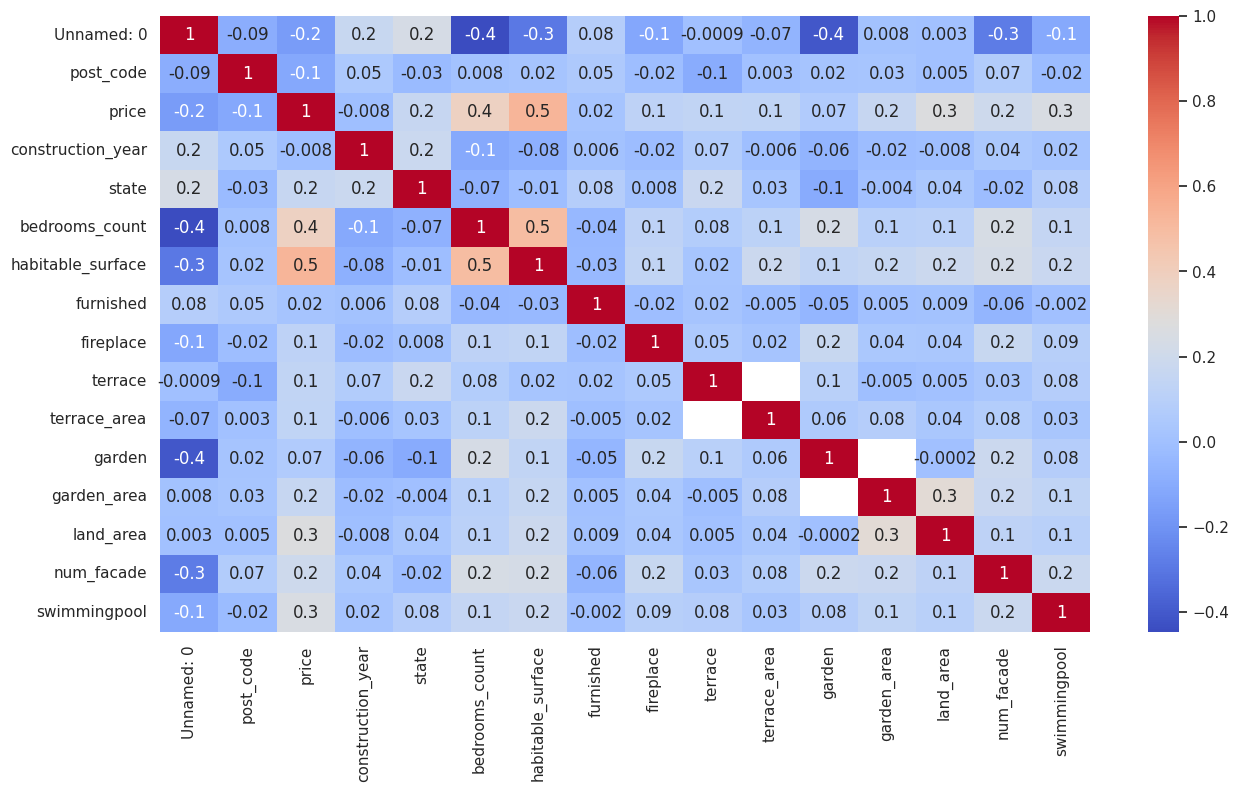

In [230]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df = pd.read_csv("all_data_cleaned.csv")

df = df.replace("HOUSE", 1)
df = df.replace("APARTMENT", 0)
df = df.replace("TO_RESTORE", 1)
df = df.replace("TO_BE_DONE_UP", 2)
df = df.replace("TO_RENOVATE", 3)
df = df.replace("JUST_RENOVATED", 4)
df = df.replace("GOOD", 5)
df = df.replace("AS_NEW", 6)
df['state'].value_counts()



plt.figure(figsize=(15,8))
sns.set_theme(style="white")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

import data and choose features

In [231]:





df = df.drop(["garden_area"], axis=1)
df = df.drop(["terrace_area"], axis=1)
df = df.drop(["land_area"], axis=1)



df = df.dropna(subset=['price'])
df = df.dropna(subset=["habitable_surface"])

z_scores_price = stats.zscore(df['price'])
z_scores_hab_surf = stats.zscore(df['habitable_surface'])


abs_z_scores_price = np.abs(z_scores_price) 
abs_z_scores_hab_surf = np.abs(z_scores_hab_surf)

filtered_entries_price = (abs_z_scores_price < 2)
filtered_entries_hab_surf = (abs_z_scores_hab_surf < 2)


temp_df = df[filtered_entries_price]
df = temp_df[filtered_entries_hab_surf]



df_no_Nan = df.dropna(axis=0,how='any')
#print(df)

# df_house = df_no_Nan.replace("HOUSE", 1)

ndarray_immoElisa = df_no_Nan.values
# ndarray_immoElisa.dropna(axis=0,how='any')
print(ndarray_immoElisa[1])

x_ndarray_immoElisa =ndarray_immoElisa[:,[7,9,10,17]] 
# state of building, bedrooms, area, swimming pool
y_ndarray_immoElisa =ndarray_immoElisa[:,5]
print(x_ndarray_immoElisa )
print(y_ndarray_immoElisa)
print(len(df))
print(len(df_no_Nan))



/tmp/ipykernel_3324/3475998101.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = temp_df[filtered_entries_hab_surf]


[1
 'https://www.immoweb.be/en/classified/house/for-sale/namur/5000/10149128?searchId=633d8f38c384b'
 5000 1 1 159000.0 1900.0 5.0 'Regular' 3.0 106.0 'INSTALLED' 0 0 0 0 2.0
 0 'Namur' 'Namur' 'Wallonia']
[[3.0 155.0 0]
 [3.0 106.0 0]
 [3.0 290.0 0]
 ...
 [1.0 53.0 0]
 [1.0 42.0 0]
 [2.0 123.0 0]]
[235000.0 159000.0 289000.0 ... 229000.0 100000.0 269000.0]
15846
6503


In [232]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_ndarray_immoElisa, y_ndarray_immoElisa, train_size=0.8)

print(x_train)
print(y_train)

[[3.0 170.0 0]
 [3.0 113.0 0]
 [4.0 225.0 0]
 ...
 [2.0 74.0 0]
 [3.0 150.0 0]
 [2.0 100.0 0]]
[345000.0 519000.0 395000.0 ... 179000.0 313000.0 259000.0]


make train,test

In [233]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

score_list = []
score1_list =[]
r2_list = []
price_error_list = []
price_error_list_train =[]

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train.reshape(-1,1))

score = reg.score(x_train, y_train.reshape(-1,1))
print(score)



y_predict_train = reg.predict(x_train)
price_error_train_sqr = mean_squared_error(y_train,y_predict_train)
price_error_train = math.sqrt(price_error_train_sqr)
print(price_error_train)

y_predict = reg.predict(x_test)
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

score1 = reg.score(x_test, y_test.reshape(-1,1))
print(score)

score1_list.append(score)
score_list.append(score)
price_error_list.append(price_error)
price_error_list_train.append(price_error_train)
r2 = r2_score(y_test,y_predict)
r2_list.append(r2)

print(r2)

0.39125911313314365
205578.97256792945
199930.43242335005
0.39125911313314365
0.40794059821499806


POLYNOMIAL REGRESSION MODEL 2

In [234]:
from cmath import exp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import math



degree = 2

polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

polyreg.fit(x_train, y_train.reshape(-1,1))


score = polyreg.score(x_train, y_train.reshape(-1,1))
print(score)


y_predict_train = polyreg.predict(x_train)
price_error_train_sqr = mean_squared_error(y_train,y_predict_train)
price_error_train = math.sqrt(price_error_train_sqr)
print(price_error_train)

y_predict = polyreg.predict(x_test)
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

score1 = reg.score(x_test, y_test.reshape(-1,1))
print(score)

score1_list.append(score)

score_list.append(score)
price_error_list.append(price_error)
price_error_list_train.append(price_error_train)
r2 = r2_score(y_test,y_predict)
r2_list.append(r2)
print(r2)

0.39397177208569933
205120.41269035716
199683.92311790833
0.39397177208569933
0.40939968750826483


plot

POLYNOMIAL REGRESSION MODEL 3

In [235]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 3

polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

polyreg.fit(x_train, y_train.reshape(-1,1))

score = polyreg.score(x_train, y_train.reshape(-1,1))
print(score)


y_predict_train = polyreg.predict(x_train)
price_error_train_sqr = mean_squared_error(y_train,y_predict_train)
price_error_train = math.sqrt(price_error_train_sqr)
print(price_error_train)

y_predict = polyreg.predict(x_test)
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

score1 = reg.score(x_test, y_test.reshape(-1,1))
print(score)

score1_list.append(score)

score_list.append(score)
price_error_list.append(price_error)
price_error_list_train.append(price_error_train)
r2 = r2_score(y_test,y_predict)
r2_list.append(r2)
print(r2)

0.3973211993933946
204552.79240595285
199801.23057392062
0.3973211993933946
0.4087055688286746


POLYNOMIAL REGRESSION MODEL 4

In [236]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 4

polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

polyreg.fit(x_train, y_train.reshape(-1,1))

score = polyreg.score(x_train, y_train.reshape(-1,1))
print(score)


y_predict_train = polyreg.predict(x_train)
price_error_train_sqr = mean_squared_error(y_train,y_predict_train)
price_error_train = math.sqrt(price_error_train_sqr)
print(price_error_train)

y_predict = polyreg.predict(x_test)
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

score1 = reg.score(x_test, y_test.reshape(-1,1))
print(score)

score1_list.append(score)

score_list.append(score)
price_error_list.append(price_error)
price_error_list_train.append(price_error_train)
r2 = r2_score(y_test,y_predict)
r2_list.append(r2)
print(r2)

0.3994634525613886
204188.9219949252
198863.18365240973
0.3994634525613886
0.4142446726467933


P 5

In [237]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

polyreg.fit(x_train, y_train.reshape(-1,1))

score = polyreg.score(x_train, y_train.reshape(-1,1))
print(score)


y_predict_train = polyreg.predict(x_train)
price_error_train_sqr = mean_squared_error(y_train,y_predict_train)
price_error_train = math.sqrt(price_error_train_sqr)
print(price_error_train)

y_predict = polyreg.predict(x_test)
price_error_sqr = mean_squared_error(y_test,y_predict)
price_error = math.sqrt(price_error_sqr)
print(price_error)

score1 = reg.score(x_test, y_test.reshape(-1,1))
print(score)

score1_list.append(score)

score_list.append(score)
price_error_list.append(price_error)
price_error_list_train.append(price_error_train)
r2 = r2_score(y_test,y_predict)
r2_list.append(r2)
print(r2)

0.4023929887607115
203690.27613021145
202092.5997861417
0.4023929887607115
0.3950655841015148


[199930.43242335005, 199683.92311790833, 199801.23057392062, 198863.18365240973, 202092.5997861417]
[205578.97256792945, 205120.41269035716, 204552.79240595285, 204188.9219949252, 203690.27613021145]
[0.39125911313314365, 0.39397177208569933, 0.3973211993933946, 0.3994634525613886, 0.4023929887607115]
[0.40794059821499806, 0.40939968750826483, 0.4087055688286746, 0.4142446726467933, 0.3950655841015148]
[0.39125911313314365, 0.39397177208569933, 0.3973211993933946, 0.3994634525613886, 0.4023929887607115]


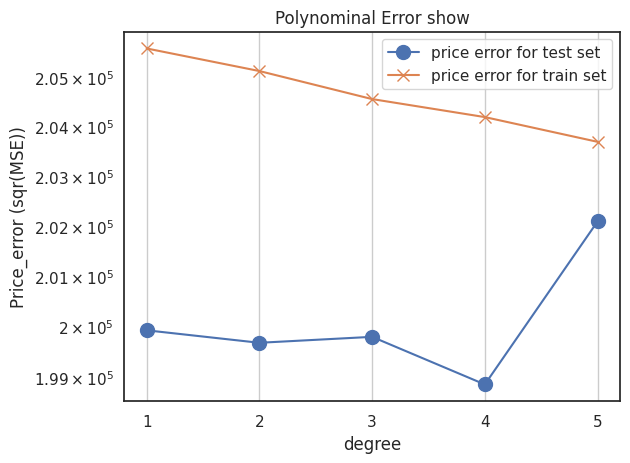

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



# plt.plot(x_train, reg.predict(x_train))
# # print(x_train)
# # print(x_test)
# print(len(x_train))
# print(len(y_train))
# plt.scatter(x_train, y_train)
# plt.title("result")
# plt.ylabel("Properties' Price")
# plt.xlabel("Features")
# plt.show()

# plt.plot(score_list)
# plt.show()
#plt.plot(r2_list)

plt.title("Polynominal Error show")
plt.ylabel("Price_error (sqr(MSE))")
plt.xlabel("degree")
plt.yscale('log')
plt.plot([1,2,3,4,5],price_error_list,label="price error for test set",marker='o',markersize=10)
plt.plot([1,2,3,4,5],price_error_list_train,label="price error for train set",marker='x',markersize=8)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
print(price_error_list)
print(price_error_list_train)
print(score_list)
print(r2_list)
print(score1_list)
plt.legend()
plt.grid()
plt.show()